In [105]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [106]:
df = pd.read_csv('Breast_Cancer.csv')

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


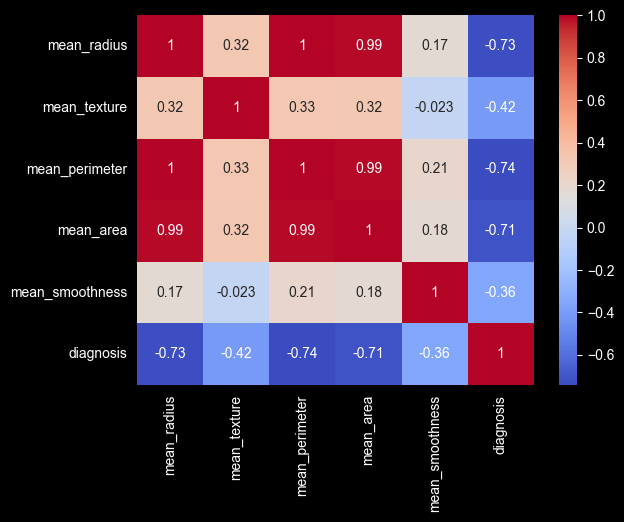

In [108]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

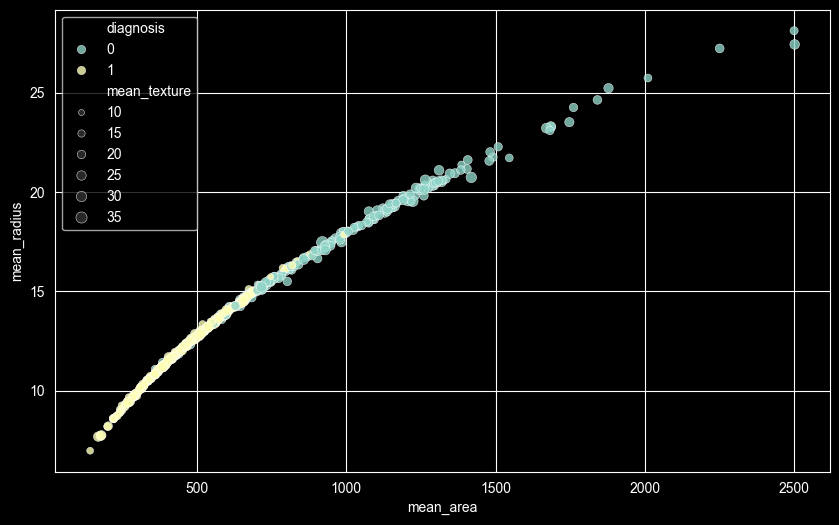

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_area', y='mean_radius', hue='diagnosis', data=df, alpha=0.8, size='mean_texture')
plt.show()

In [110]:
df['mean_radius'] = pd.qcut(df['mean_radius'], q=10, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], duplicates='drop')

In [111]:
df['mean_texture'] = pd.qcut(df['mean_texture'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6'], duplicates='drop')

In [112]:
df['mean_perimeter'] = pd.qcut(df['mean_perimeter'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5'], duplicates='drop')

In [113]:
df['mean_area'] = pd.qcut(df['mean_area'], q=8, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8'], duplicates='drop')

In [114]:
df['mean_smoothness'] = pd.qcut(df['mean_smoothness'], q=10, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], duplicates='drop')

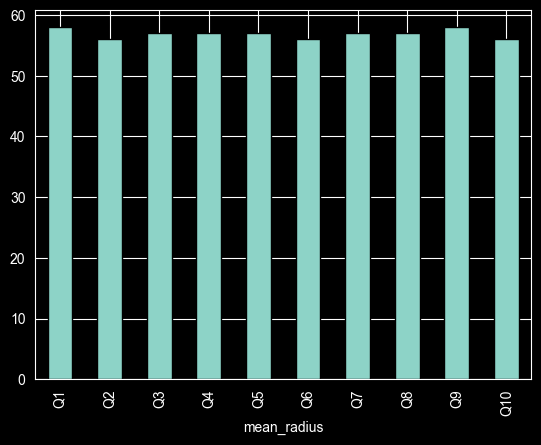

In [115]:
df['mean_radius'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.show()

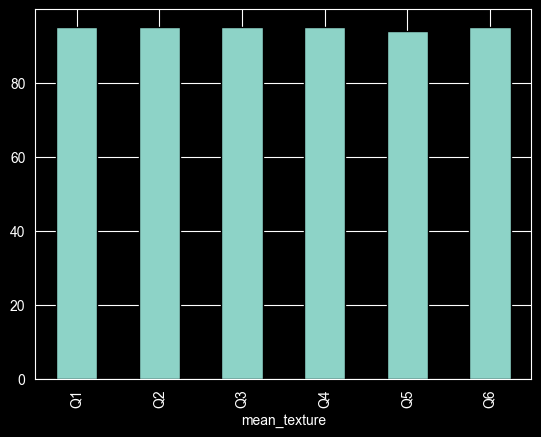

In [116]:
df['mean_texture'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.show()

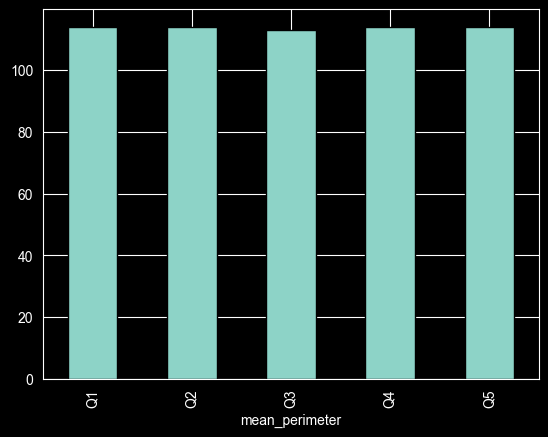

In [117]:
df['mean_perimeter'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.show()

In [118]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [119]:
df.sample(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
36,Q7,Q5,Q4,Q5,Q6,0
174,Q2,Q2,Q1,Q2,Q4,1
197,Q9,Q5,Q5,Q7,Q1,0


In [120]:
def model_probs(X_train, y_train, target_col):
    # Combine features and target into one DataFrame
    df = pd.concat([X_train, y_train], axis=1)

    # Total rows
    ptot = len(df)

    # Count how many times each class appears
    pk = df[target_col].value_counts()

    # Dictionary to store counts for each feature
    pki = {}

    # Loop through each feature column
    for col in df.columns:
        if col == target_col:
            continue  # skip the target column
        # Group by class and feature value, count occurrences
        counts = df.groupby([target_col, col]).size().to_dict()
        pki[col] = counts

    return ptot, pk, pki

In [ ]:
ptot, pk, pki=model_probs(X_train, y_train, 'diagnosis')

In [ ]:
laplace={}
ptot, pk, pki=model_probs(X_train, y_train, 'diagnosis')
def Naive_Bayes_Model(row):
    EPS = 1
    laplace={}

    for col in X_train.columns:
        laplace[col]=X_train[col].nunique()

    C_Probs =  {}
    for i in pk.index:
        pc=pk[i]
        logSum = math.log(pc/ptot)

        for col_name, col_value in row.items():
            count = (col_name,col_value)
            col_dict = pki.get(col_name,{})
            count_in_col = col_dict.get(count, 0)

            laplace_add = laplace.get(col_name, 1)

            probability = (count_in_col+EPS)/(pc+laplace_add)

            logSum += math.log(probability)

        C_Probs[i] = logSum

    ans = max(C_Probs, key=C_Probs.get)
    return ans

In [128]:
y_pred = X_test.apply(lambda row: Naive_Bayes_Model(row), axis=1)

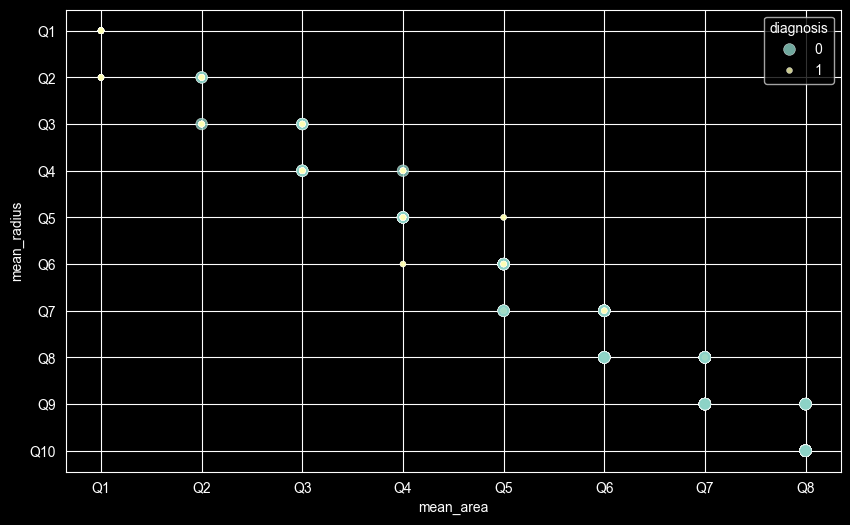

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_area', y='mean_radius', hue='diagnosis', data=df, alpha=0.8, size='diagnosis')
plt.show()

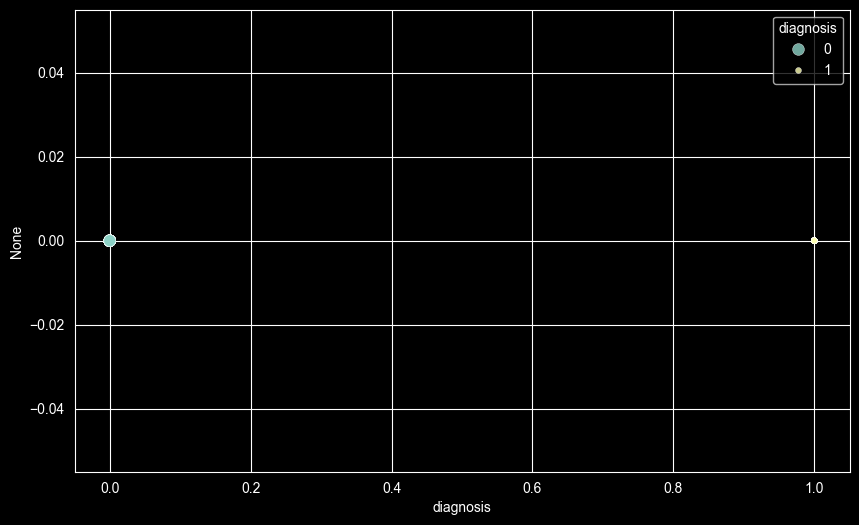

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test,y=y_pred, hue='diagnosis', data=df, alpha=0.8, size='diagnosis')
plt.show()